<a href="https://colab.research.google.com/github/zishanparwez/Spam-SMS-Classification-using-NLP/blob/main/Spam_SMS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [3]:
sms = pd.read_csv('/content/spam.csv',encoding='latin1')
sms = sms.iloc[:,[0,1]]
sms.columns = ["label", "message"]
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.shape

(5572, 2)

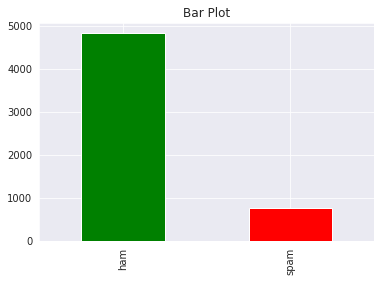

In [5]:
count_Class=pd.value_counts(sms["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show();

In [6]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


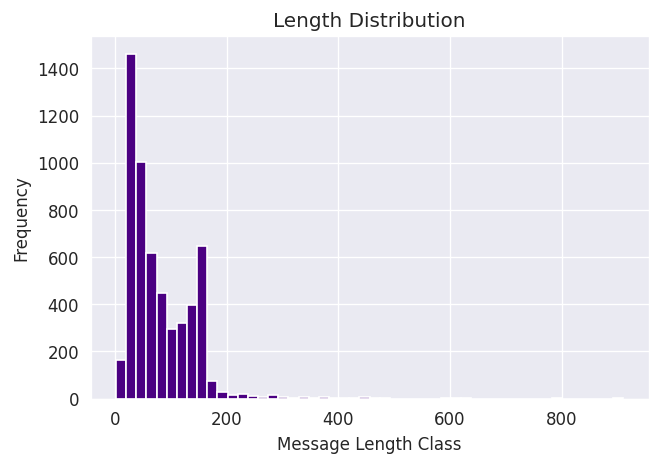

In [8]:
fig = plt.figure(dpi = 120)
ax = plt.axes()
sms['length'].plot(bins=50, kind='hist',ax=ax,color = 'indigo')
ax.set(xlabel = 'Message Length Class',ylabel = 'Frequency',title = 'Length Distribution');

Text(0.5, 0, 'Message Length')

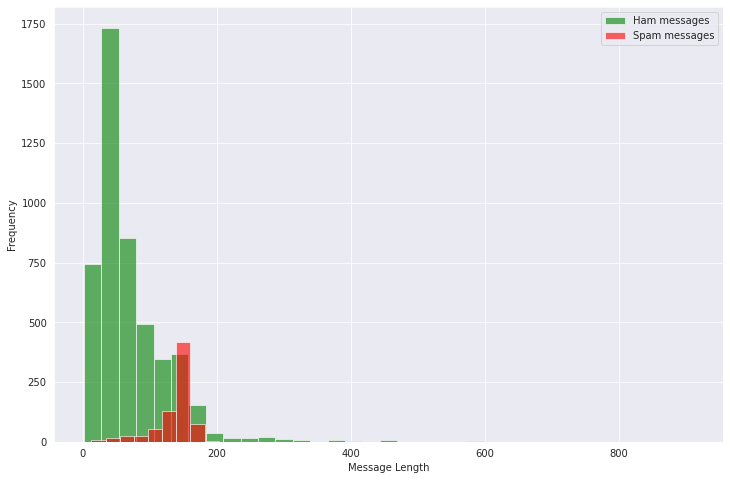

In [9]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].length.plot(bins=35, kind='hist', color='green', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].length.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [10]:
from collections import Counter

count1 = Counter(" ".join(sms[sms['label']=='ham']["message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(sms[sms['label']=='spam']["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

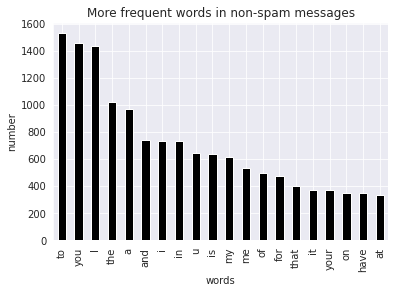

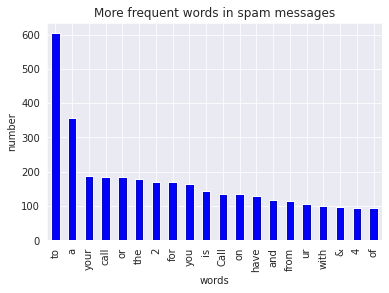

In [11]:
df1.plot.bar(legend = False,color="black")
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


df2.plot.bar(legend = False, color = 'blue')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [12]:
sms[sms.length == 200].message.iloc[0]

'Open rebtel with firefox. When it loads just put plus sign in the user name place, and it will show you two numbers. The lower number is my number. Once you pick that number the pin will display okay!'

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [14]:
vocab_size = 400
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 16

In [16]:
encode = ({'ham': 0, 'spam': 1} )
#new dataset with replaced values
sms = sms.replace(encode)

In [17]:
sms.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
X = sms['message']
Y = sms['label']

In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
# convert to sequence of integers
X = tokenizer.texts_to_sequences(X)

In [20]:
X = np.array(X)
y = np.array(Y)

In [21]:
from keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen=max_length)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=7)

In [23]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           6400      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 6,833
Trainable params: 6,833
Non-trainable params: 0
_________________________________________________________________


In [24]:
num_epochs = 30
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test,y_test), verbose=2)

Epoch 1/30
131/131 - 0s - loss: 0.5084 - accuracy: 0.8543 - val_loss: 0.3796 - val_accuracy: 0.8693
Epoch 2/30
131/131 - 0s - loss: 0.3807 - accuracy: 0.8648 - val_loss: 0.3663 - val_accuracy: 0.8693
Epoch 3/30
131/131 - 0s - loss: 0.3682 - accuracy: 0.8648 - val_loss: 0.3534 - val_accuracy: 0.8693
Epoch 4/30
131/131 - 0s - loss: 0.3510 - accuracy: 0.8648 - val_loss: 0.3312 - val_accuracy: 0.8693
Epoch 5/30
131/131 - 0s - loss: 0.3194 - accuracy: 0.8641 - val_loss: 0.2891 - val_accuracy: 0.8693
Epoch 6/30
131/131 - 0s - loss: 0.2644 - accuracy: 0.8679 - val_loss: 0.2250 - val_accuracy: 0.8780
Epoch 7/30
131/131 - 0s - loss: 0.2060 - accuracy: 0.9084 - val_loss: 0.1761 - val_accuracy: 0.9218
Epoch 8/30
131/131 - 0s - loss: 0.1675 - accuracy: 0.9452 - val_loss: 0.1444 - val_accuracy: 0.9541
Epoch 9/30
131/131 - 0s - loss: 0.1410 - accuracy: 0.9555 - val_loss: 0.1230 - val_accuracy: 0.9598
Epoch 10/30
131/131 - 0s - loss: 0.1230 - accuracy: 0.9615 - val_loss: 0.1091 - val_accuracy: 0.9627

In [25]:
result = model.evaluate(X_test, y_test)
# extract those
loss = result[0]
accuracy = result[1]


print(f"[+] Accuracy: {accuracy*100:.2f}%")

44/44 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9856
[+] Accuracy: 98.56%


In [26]:
from keras.preprocessing import sequence

In [27]:
def get_predictions(txts):
    txts = tokenizer.texts_to_sequences(txts)
    txts = sequence.pad_sequences(txts, maxlen=max_length)
    preds = model.predict(txts)
    if(preds[0] > 0.5):
        print("SPAM MESSAGE")
        
    else:
        print('NOT SPAM')

In [28]:
txts=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005"]

get_predictions(txts)

SPAM MESSAGE


In [29]:
txts = ["Hi man, I was wondering if we can meet tomorrow."]
get_predictions(txts)

NOT SPAM
